# Continuación clase de optimización de código

In [7]:
# Paquetes a utilizar
from functools import reduce
import numpy as np
import scipy.special as sps 
from itertools import cycle  # Librería para hacer ciclos
import matplotlib.pyplot as plt

# Variables locales, globales y no locales

* ## Variable global

In [12]:
x = "global"

def foo():
    global x
    x = x * 2
    y = x * 2
    print("x inside :", x)
    print("y inside :", y)

foo()
print("x outside:", x)
print("y outside:", y)

x inside : globalglobal
y inside : globalglobalglobalglobal
x outside: globalglobal


NameError: name 'y' is not defined

¿Qué sucede si intento asignar un valor a la variables x desde la función?

In [9]:
x = "global"

def foo():
    global x
    x = x * 2
    print('dentro de la función,', x)

foo()
print('fuera de la función, ', x)

dentro de la función, globalglobal
fuera de la función,  globalglobal


* ## Variable local

Intentando acceder a una variable local 

In [10]:
def foo():
    y = "local"

foo()
print(y)

NameError: name 'y' is not defined

Mostrando el valor de una variable local

In [16]:
def foo():
    y = "local"
    
    def local_f():
        nonlocal y
        y = y * 2
        print(y)
    
    local_f()
    
    print(y)

foo()
local_f()

locallocal
locallocal


NameError: name 'local_f' is not defined

**Variables locales y globales en el mismo código**

In [14]:
x = "global"

def foo():
    global x
    y = "local"
    x = x * 2
    print(y)
    print(x)
    
foo()

local
globalglobal


**Variables locales y globales con el mismo nombre**

In [25]:
x = 5

def foo():
#     global x
    x = 10
    print("local x:", x)

foo()
print("global x:", x)

local x: 10
global x: 5


* ## Variables no locales

Crear una variable no local

In [27]:
y = 8

def outer():
    x = "local"
    
    def inner():
        global y
        nonlocal x
        x = "nonlocal"
        y = 10
        print("inner:", x)
        print('inner 2:', y)
    
    inner()
    print("outer:", x)
    print("outer 2:", y)

outer()

inner: nonlocal
inner 2: 10
outer: local
outer 2: 8


### Ejercicio:
Resolver de manera eficiente la siguiente ecuación a diferencia 
$$x_n = (ax_{n−1} + b) \mod m$$
Haciendo uso de las variables no locales y compresión de listas o funciones map

In [32]:
%%timeit
# Parámetros del modelo
a,b,n,m,x0 = 1,2,5000,9,1

# 1. Método ineficiente
xn = [x0]
for i in range(n - 1):
    xn.append((a * xn[-1] + b) % m)
xn

607 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%%timeit

# 2. Método funciones anidadas
a,b,n,m,x0 = 1,2,5000,9,1

def principal(a,b,n,m,x0):
    xn = np.zeros(n)
    xn[0] = x0
    def secundaria(i):
        nonlocal xn
        xn[i] = (a * xn[i -1] + b) % m
    
    [secundaria(i) for i in range(1, n)]
    return xn

principal(a,b,n,m,x0)

3.64 ms ± 93.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%%timeit
# 3. Usando funciones y variables globales
a,b,n,m,x0 = 1,2,5000,9,1

xn = np.zeros(n)
xn[0] = x0
    
def funcion_mat(i):
    global xn
    xn[i] = (a * xn[i -1] + b) % m
    
list(map(funcion_mat, range(1, n)))

xn
    

3.41 ms ± 45 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Ejercicio: Vectorizar distribución de poisson
$$\textbf{Función de densidad de probabilidad}\\p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

In [38]:
sps.factorial(np.array([0, 1, 2]))

array([1., 1., 2.])

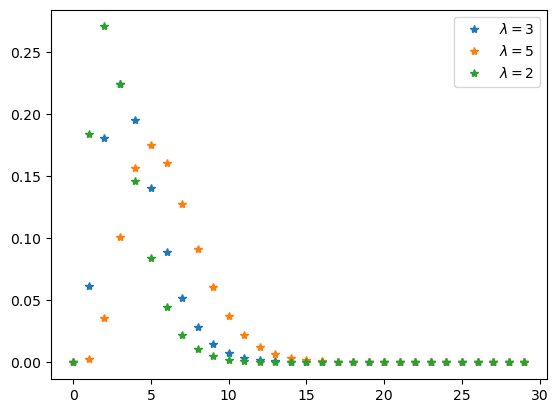

In [40]:
N = 30
l = [1, 3, 5]
k = np.arange(N)

p = lambda k,l: (l**k * np.exp(-l)) / sps.factorial(k)

# Graficar para todo l una gráfica de p(k) usando subplots (como matrices)

[plt.plot(p(l2, k), '*', label=f'$\lambda={l2}$') for l2 in [3, 5, 2]]
plt.legend()
# contruir el legend en latex para cada l

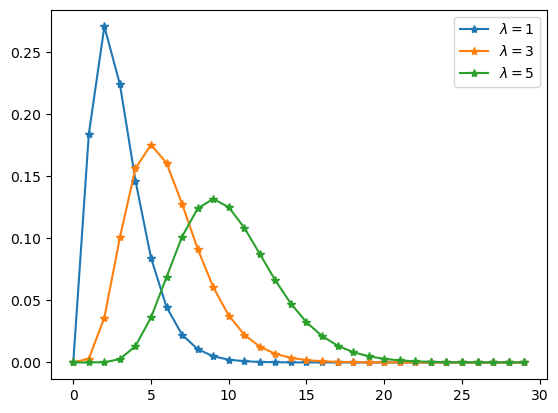

In [50]:
plt.plot(np.array([p(l, k) for l in [2,5,9]]).T, '*-')
plt.legend([f'$\lambda = {l2}$' for l2 in l])


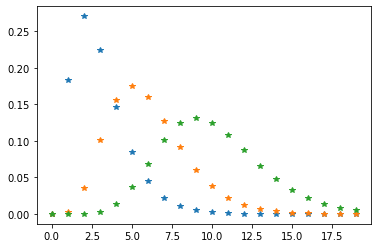

In [43]:
plt.plot(np.array([p(l, k) for l in [2,5,9]]).T, '*')

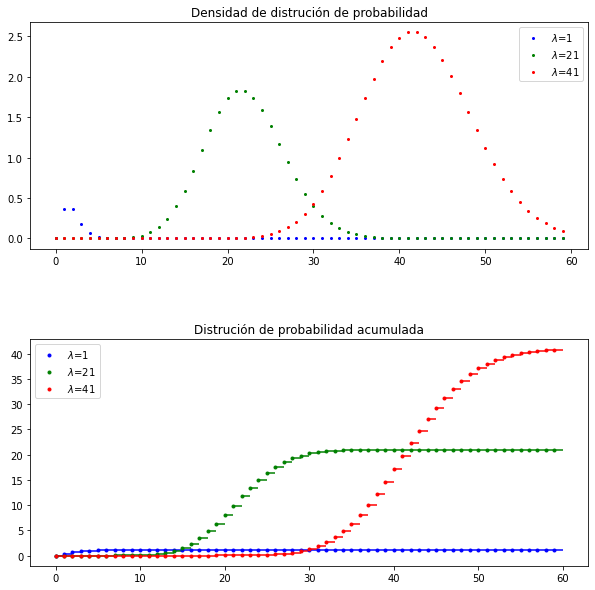

In [40]:
## Forma de resolver el problema de manera típica (para olvidar)
cycol = cycle('bgrcmk')

p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k)

# Como se haría de forma ineficiente
l= 1

# Gráficas en diferentes subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10));

ax1.title.set_text('Densidad de distrución de probabilidad')
ax2.title.set_text('Distrución de probabilidad acumulada')

for i in range(3):
    P = []
    c = next(cycol)
    for k in range(60):
        P.append(p(k,l))
    
    ax1.plot(P,'o',c=c,label='$\lambda$=%s' % l, markersize=2)        
    ax1.legend()
    
    ax2.plot(np.cumsum(P),'o',c=c,label='$\lambda$=%s' % l, markersize=3)
    ax2.legend()
    ax2.hlines(np.cumsum(P),range(len(P)),range(1,len(P)+1),color=c)
    l +=20
    
plt.subplots_adjust(hspace=.4)
plt.show()


## Resolverlo de manera vectorizada


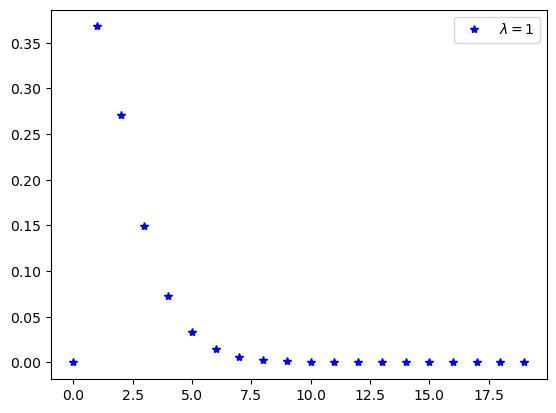

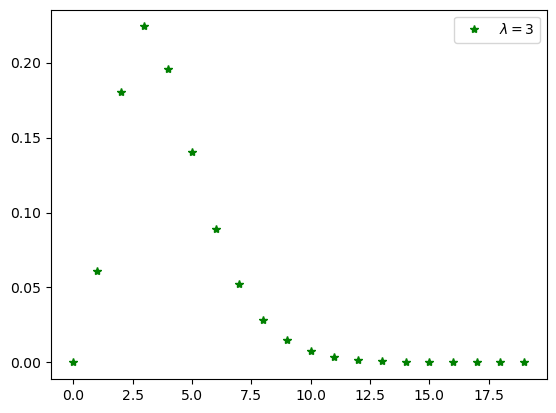

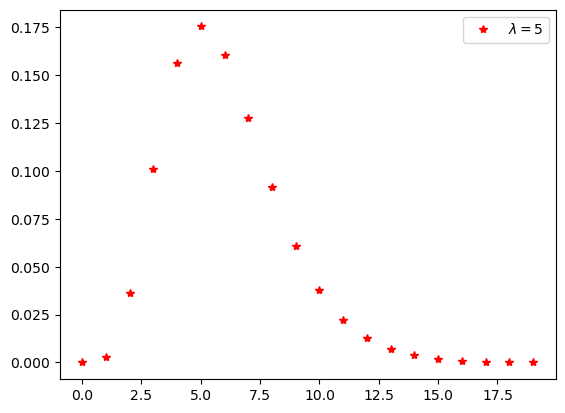

[None, None, None]

In [64]:
# Ahora crea una función tal que al llamarla cree una gráfica de p(k) para un
# lambda dado
def plotExponential(lamb, N, cycol):
    k = np.arange(N)

    p = lambda k,l: (l**k * np.exp(-l)) / sps.factorial(k)

    # Graficar para todo l una gráfica de p(k) usando subplots (como matrices)
    
    plt.plot(p(lamb, k), '*', label=f'$\lambda={lamb}$', color=cycol)
    plt.legend()
    plt.show()
    
cycol = cycle('bgrcmk')

[plotExponential(l2, 20, next(cycol)) for l2 in l]

# Ejercicios 

1. Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`

In [17]:
########### Solución
texto='the notion of a lambda function goes all the way back to the \
        origin of computer science'


['the', 'of', 'a', 'goes', 'all', 'the', 'way', 'back', 'to', 'the', 'of']

2. Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

In [20]:
########### Solución 
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
temperatures


array([ 35.97387961,  99.13294268,  92.6178302 ,  99.69549478,
        63.21119535,  73.90387697,  95.50028838,  99.21476553,
        36.98251238, 101.45813729, 100.5917418 ,  89.38159435,
        89.52156589,  83.8084752 ,  28.37990868,  68.75395211,
        45.86132067,  36.58307493,  56.32208365,  33.96219302,
        45.29071318,  74.86289938,  66.51091383,  88.19316186,
        94.26635864,  46.83131624, 109.60744472, 109.68427993,
        44.55796499,  92.84146259])

In [22]:
# Solucionarlo usando la función filter

# Solucionarlo usando filtro de vectores

0.4666666666666667

3. Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations

> **Hint**: Explore the command `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

In [18]:
########### Solución 5
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
print(point_xy)


[[17 97]
 [22 33]
 [37 46]
 [57 28]
 [11 25]
 [14  2]
 [74 16]
 [12 37]
 [35 21]
 [66 65]
 [86 58]
 [67 81]
 [ 0 48]
 [28 66]
 [76 22]
 [46 47]
 [64  7]
 [88 94]
 [65 13]
 [75 89]
 [23 17]
 [36 63]
 [62 36]
 [64 17]
 [18 19]
 [88 41]
 [21 49]
 [98 36]
 [81 73]
 [62 90]]


In [19]:
# Solución

array([0, 2])

4. Find all of the numbers from 1-1000 that are divisible by 7

In [27]:
# Lista de números
number = np.arange(1,1001)

# Resultado usando for tradicional 


# Resultado usando compresión de listas


# Resultado usando la función filter


[7,
 14,
 21,
 28,
 35,
 42,
 49,
 56,
 63,
 70,
 77,
 84,
 91,
 98,
 105,
 112,
 119,
 126,
 133,
 140,
 147,
 154,
 161,
 168,
 175,
 182,
 189,
 196,
 203,
 210,
 217,
 224,
 231,
 238,
 245,
 252,
 259,
 266,
 273,
 280,
 287,
 294,
 301,
 308,
 315,
 322,
 329,
 336,
 343,
 350,
 357,
 364,
 371,
 378,
 385,
 392,
 399,
 406,
 413,
 420,
 427,
 434,
 441,
 448,
 455,
 462,
 469,
 476,
 483,
 490,
 497,
 504,
 511,
 518,
 525,
 532,
 539,
 546,
 553,
 560,
 567,
 574,
 581,
 588,
 595,
 602,
 609,
 616,
 623,
 630,
 637,
 644,
 651,
 658,
 665,
 672,
 679,
 686,
 693,
 700,
 707,
 714,
 721,
 728,
 735,
 742,
 749,
 756,
 763,
 770,
 777,
 784,
 791,
 798,
 805,
 812,
 819,
 826,
 833,
 840,
 847,
 854,
 861,
 868,
 875,
 882,
 889,
 896,
 903,
 910,
 917,
 924,
 931,
 938,
 945,
 952,
 959,
 966,
 973,
 980,
 987,
 994]

5. Find all of the numbers from 1-1000 that have a 3 in them

In [52]:
# Lista de números
number = np.arange(1,1001)

# Resultado usando for tradicional 

# Resultado usando compresión de listas

# Resultado usando la función filter


[3,
 13,
 23,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 43,
 53,
 63,
 73,
 83,
 93,
 103,
 113,
 123,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 143,
 153,
 163,
 173,
 183,
 193,
 203,
 213,
 223,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 243,
 253,
 263,
 273,
 283,
 293,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 403,
 413,
 423,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,


6. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
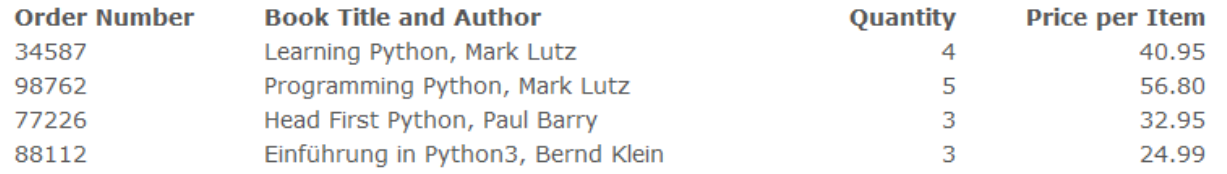
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

In [31]:
########### Solución
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]


[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

### Forma alternativa

In [32]:
# Creando una función que incremente en 10 euros si el pedido es menor a 100

7. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de orden, cantidad total de pedido). Nuevamente, tenga en cuenta que si el pedido debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €.  Utilice la función `Reduce`.

In [47]:
########### Solución
orders = [ [1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
           [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
           [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]



[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]